## 测试多个热图画图技巧

In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

test1 = pd.DataFrame(np.random.rand(2,4,4))
print(test1,'\n')

ValueError: Must pass 2-d input

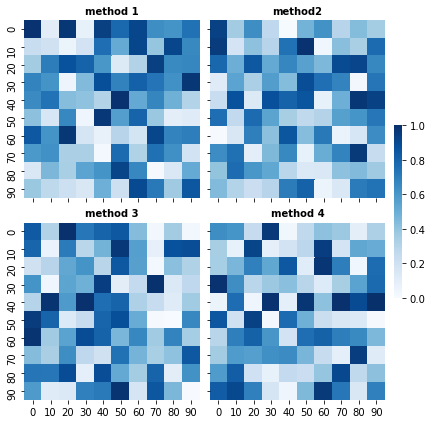

In [6]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns

methods=['method 1', 'method2', 'method 3', 'method 4']
times = range(0, 100, 10)
data = pd.DataFrame(list(itertools.product(methods, times, times)))
data.columns = ['method', 'dtsi','rtsi']
data['nw_score'] = np.random.sample(data.shape[0])

def facet_heatmap(data, color, **kws):
    data = data.pivot(index="dtsi", columns='rtsi', values='nw_score')
    sns.heatmap(data, cmap='Blues', **kws)  # <-- Pass kwargs to heatmap

with sns.plotting_context(font_scale=5.5):
    g = sns.FacetGrid(data, col="method", col_wrap=2, height=3, aspect=1)

cbar_ax = g.fig.add_axes([.92, .3, .02, .4])  # <-- Create a colorbar axes

g = g.map_dataframe(facet_heatmap,
                    cbar_ax=cbar_ax,
                    vmin=0, vmax=1)  # <-- Specify the colorbar axes and limits

g.set_titles(col_template="{col_name}", fontweight='bold', fontsize=18)
g.fig.subplots_adjust(right=.9)  # <-- Add space so the colorbar doesn't overlap the plot

Text(69.0, 0.5, 'kind')

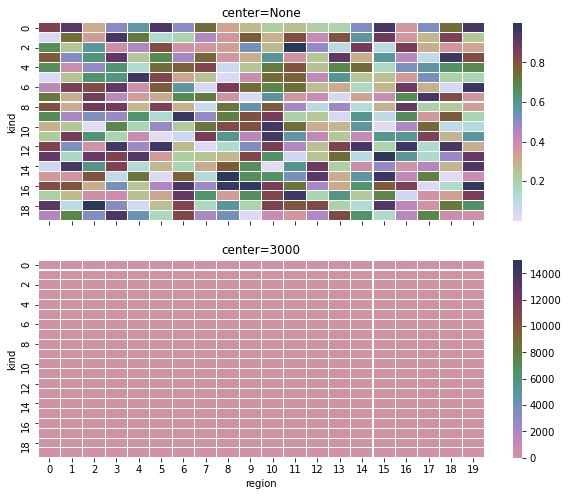

In [15]:
pt = np.random.rand(20,20)

f, (ax1,ax2) = plt.subplots(figsize = (10, 8),nrows=2)
cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(pt, linewidths = 0.05, ax = ax1, vmax=pt.max(), vmin=pt.min(), cmap=cmap, center=None )
# center为None时，由于最小值为0，最大值为15000，相当于center值为vamx和vmin的均值，即7500
ax1.set_title('center=None')
ax1.set_xlabel('')
ax1.set_xticklabels([]) #设置x轴图例为空值
ax1.set_ylabel('kind')
sns.heatmap(pt, linewidths = 0.05, ax = ax2, vmax=15000, vmin=0, cmap=cmap, center=3000 ) 
# 由于均值为2000，当center设置为3000时，大部分数据会比7500大，所以center=3000时，生成的图片颜色要深
# 设置center数据时，如果有数据溢出，则手动设置的vmax或vmin会自动改变
ax2.set_title('center=3000')
ax2.set_xlabel('region')
ax2.set_ylabel('kind')
